## AST4310, Autumn 2021, Project 1

Authored by (candidate numbers): ***XXX*** and ***YYY***.



#### Header and imports

*Please include in the code cell below all the library imports and other header parts you need (e.g. defining constants, etc.). It becomes cleaner and easier to read if the imports appear at the top and not scattered through the code.*

In [1]:
%%javascript  # Allow equation numbers
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

In [11]:
# Imports 
import numpy
import matplotlib.pyplot as plt
from matplotlib import cm

from astropy import units
from astropy import constants
from astropy.visualization import quantity_support
quantity_support()

#from matplotlib_inline.backend_inline import set_matplotlib_formats

#set_matplotlib_formats('svg')
plt.rc('legend', frameon=False)
plt.rc('figure', figsize=[7, 7/1.3])
plt.rc('font', size=12)

### Exercise 1: The Boltzmann and Saha laws

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">
<i> <ul>
<li>Identify the four hydrogen lines in the image with stellar spectrograms (first figure in section 1). Looking at the hydrogen energy level diagram in section 1.2, to which series do they correspond? What are their lower and upper levels? Compute their central wavelengths precisely using equation (5).</li> </ul></i>
</div>

In [47]:
levels = (numpy.loadtxt('H_atom.txt', unpack=True)[0] / units.cm).to('aJ',equivalencies=units.spectral())
# chi = (chi / units.cm).to('aJ', equivalencies=units.spectral())
l = []

for i in range(len(levels)-1): # complete the difference in energy levels
    l.append([])
    for j in range(i+1,len(levels)):
        dE = (levels[j]-levels[i])
        li = ((constants.c * constants.h) / dE).to('nm')
        l[i].append(li)

print('Lyman series: ', l[0])
print('Balmer series: ', l[1])
print('Paschen series: ', l[2])
print('Brackett series: ', l[3])
print('Pfund series: ', l[4])

print('\nThe absorption lines in the figure in section 1 corresponds to the Balmer series.\n')


"""Compute their central wavelengths precisely using equation (5)."""
# g = 2*s**2
# chi = 13.598*(1-1/s**2) [eV]

g = (numpy.loadtxt('H_atom.txt', unpack=True)[1])
s = numpy.sqrt(g/2)
chi = 13.598*(1-1/s**2)*units.eV

print(chi)
((constants.c * constants.h) / chi).to("nm")

Lyman series:  [<Quantity 121.56841096 nm>, <Quantity 102.57334048 nm>, <Quantity 97.25472664 nm>, <Quantity 94.97532294 nm>, <Quantity 91.17630628 nm>]
Balmer series:  [<Quantity 656.46916223 nm>, <Quantity 486.27359065 nm>, <Quantity 434.17293551 nm>, <Quantity 364.70520186 nm>]
Paschen series:  [<Quantity 1875.62821823 nm>, <Quantity 1282.16815661 nm>, <Quantity 820.58701841 nm>]
Brackett series:  [<Quantity 4052.28747576 nm>, <Quantity 1458.82091383 nm>]
Pfund series:  [<Quantity 2279.40541254 nm>]

The absorption lines in the figure in section 1 corresponds to the Balmer series.

[  0.          10.1985      12.08711111  12.748125    13.05408
 -13.598     ] eV


/Users/isakaaby/anaconda3/lib/python3.6/site-packages/astropy/units/quantity.py:477: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


<Quantity [         inf, 121.57101381, 102.5755429 ,  97.25681105,
            94.97735454, -91.17826036] nm>

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">
<i> <ul>
<li>Payne's basic assumption was that the strength of the absorption lines observed in stellar spectra scales linearly with the population density of the lower level of the corresponding transition. Why would she think so? (It is not correct, but generally stellar absorption lines do get stronger at larger lower-level population. In this exercise we follow her example and assume that the scaling is linear.)</li> </ul></i>
</div>

The more atoms we have of the lower level in a given transition, the more likely it is that we get absorption from that level. This is because the lower level contains a lot more electrons that can be exited, and this creates more absorption lines and thus the strength ratio of absorption increases.

Levels further out from the lower levels contains a lot fewer electrons, and so the amount of absorption from these line-transitions is much smaller.

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">
<i> <ul>
<li>Use this expectation to give initial rough estimates of the strength ratios of the α
lines in the the H I Lyman, Balmer, Paschen and Brackett series. Use T=5000 K.</li> </ul></i>
</div>

For this exercise we use the partitioning (strength ratios) of a specific atom or ion stage $r$ over its discrete energy levels $s$, given by

$$
\frac{n_{r,s}}{N_r} = \frac{g_{r,s}}{U_r}e^{-\chi_{r,s}/kT}
\tag{1}\label{boltzmann}
$$

where $T$ is the temperature, $k$ the boltzmann constant, $n_{r,s}$ the number of particles per $m^3$ in level $s$ and ionisation stage $r$. The $g_{r,s}$ is the statistical weight of the given level $s$, $N_{r}$ is the total density of particles in all levels for a given ionisation stage $r$, given by the sum

$$
N_r \equiv \sum_{s} n_{r,s} \tag{2}\label{N}
$$

The exitation energy $\chi_{r,s}$ in level $s$ is measured from the ground state by the following equation

$$
\chi_{r,s} = 13.598(1-1/s^2)\text{eV} \tag{3}\label{chi}
$$

Then we calculate the partition function $U_r$ for $T = 5000$ K and for the lowest ionisation stage, by summing over all levels in the following way

$$
U_r \equiv \sum_{s} g_{r,s}e^{-\chi_{r,s}/kT} \tag{4}\label{U}
$$

Since we are only interested in the $\alpha$ lines from Lyman, Balmer, Paschen and Brakett, we only look at the first ionisation stage ($r = 1$). This means that we only calculate Lyman from $s = 1 \rightarrow s = 2$, Balmer from $s = 2 \rightarrow s = 3$, Paschen from $s = 3 \rightarrow s = 4$ and Brackett from $s = 4 \rightarrow s = 5$.

In [334]:
def U(T):
    """
    calculates the partition function for a given temperature T for s in [1,30]
    """
    
    s = numpy.linspace(1,30,30)
    g = 2*s**2
    chi = 13.598*(1-1/(s**2))*units.eV
    return numpy.nansum(g*numpy.exp(-chi/(constants.k_B*T)))


T = 5000*units.K  # temperature K

def Boltzmann_law(s,T):
    """
    Computes the boltzmann relation for temperature T and a given energy level s
    """
    g = 2*s**2
    chi = 13.598*(1-1/(s**2))*units.eV
    return g*numpy.exp(-chi/(constants.k_B*T))

s_ly = 1; s_bal = 2; s_pash = 3; s_brack = 4   #energy level for Lyman, Balmer, Paschen, Brackett

print("Lyman strength ratio: ", Boltzmann_law(s_ly,T)/U(T))
print("Balmer strength ratio: ",Boltzmann_law(s_bal,T)/U(T))
print("Paschen strength ratio: ",Boltzmann_law(s_pash,T)/U(T))
print("Brackett strength ratio: ",Boltzmann_law(s_brack,T)/U(T))


Lyman strength ratio:  0.9999999995778817
Balmer strength ratio:  2.1009921343952661e-10
Paschen strength ratio:  5.901613025076004e-12
Brackett strength ratio:  2.262431957460449e-12


We see from the strength ratios of the different $\alpha$ lines above, that the Lyman line dominates over the other series. This makes sense since we know that hydrogen only contains 1 electron, and so we expect the strength of absorption from the lower level transition ($s = 1$) to dominate over the other transitions. This is why the strength ratios from the other 3 lines are so small, and for Lyman it is almost equal to 1.

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">
<i> <ul>
<li>Explain from equations (1) and (3) why the Saha and Boltzmann distributions behave differently for increasing temperature.</li> </ul></i>
</div>

The Boltzmann law is given by

$$
\frac{n_{r,s}}{N_r} = \frac{g_{r,s}}{U_r}e^{-\chi_{r,s}/kT}
\tag{5}\label{boltzmann2}
$$

and the Saha law 

$$
\frac{N_{r+1}}{N_{r}} = \frac{1}{N_e}\frac{2U_{r+1}}{U_{r}}\left(\frac{2\pi m_e k T}{h^2}\right)^{3/2}e^{-\chi_{r}/kT}
\tag{6}\label{saha}
$$

where the ratio $N_{r+1}/N_{r}$ is the partitioning over different ionisation stages, $N_{e}$ is the electron density and $m_e$ is the electron mass.

As one can see from \ref{boltzmann2}, the exponential term will approach $1$ as $T \rightarrow \infty$. The partition function $U_{r}$ from equation (4) will only be the sum of the statistical weights $g_{r,s}$ for all levels $s$. The Boltzmann equation.



<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">
<i> <ul>
<li>Speculate how ionisation can fully deplete a stage (e.g. all atoms can transition from neutral to ionised) while excitation puts only a few atoms in levels just below the ionisation level. Hint: what is the limit of the Saha and Boltzman ratios for infinite temperature?</li> </ul></i>
</div>

Answer here

### Exercise 2: Saha-Boltzmann populations of a simplified Ca atom

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

* Using the simplified Ca atom (`Ca_atom.txt`), plot and discuss the temperature variation of the partition functions $U_r$ for the first four ionisation stages in the file. Look in the temperature range between 100 - 30,000 K. What can you say about the temperature dependence of $U_r$?
</div>

In [96]:
class Atom:
    """
    Reads atomic data, calculates level populations according to Boltzmann's law,
    and ionisation fractions according to Saha's law.
    """
    
    def __init__(self, atomfile=None):
        """
        Parameters
        ----------
        atomfile : string, optional
            Name of file with atomic data. If not present, atomic data needs
            to be loaded with the .read_atom method.
        """
        self.loaded = False
        if atomfile:
            self.read_atom(atomfile)
        
    def read_atom(self, filename):
        """
        Reads atom structure from text file.
        
        Parameters
        ----------
        filename: string
            Name of file with atomic data.
        """
        tmp = numpy.loadtxt(filename, unpack=True)
        self.n_stages = int(tmp[2].max()) + 1
        # Get maximum number of levels in any stage
        self.max_levels = 0
        for i in range(self.n_stages):
            self.max_levels = max(self.max_levels, (tmp[2] == i).sum())
        # Populate level energies and statistical weights
        # Use a square array filled with NaNs for non-existing levels
        chi = numpy.empty((self.n_stages, self.max_levels))
        chi.fill(numpy.nan)
        self.g = numpy.copy(chi)
        for i in range(self.n_stages):
            nlevels = (tmp[2] == i).sum()
            chi[i, :nlevels] = tmp[0][tmp[2] == i]
            self.g[i, :nlevels] = tmp[1][tmp[2] == i]
        # Put units, convert from cm-1 to Joule
        chi = (chi / units.cm).to('aJ', equivalencies=units.spectral())
        # Save ionisation energies, saved as energy of first level in each stage
        self.chi_ion = chi[:, 0].copy()
        # Save level energies relative to ground level in each stage
        self.chi = chi - self.chi_ion[:, numpy.newaxis]
        self.loaded = True
        
    def compute_partition_function(self, temperature):
        """
        Computes partition functions using the atomic level energies and
        statistical weights.
        
        Parameters
        ----------
        temperature: astropy.units.quantity (scalar or array)
            Gas temperature in units of K or equivalent.
        """
        if not self.loaded:
            raise ValueError("Missing atom structure, please load atom with read_atom()")
        temp = temperature[numpy.newaxis, numpy.newaxis]  # to allow broadcast
        return numpy.nansum(self.g[..., numpy.newaxis] * 
                            numpy.exp(-self.chi[..., numpy.newaxis] / 
                                      constants.k_B / temp), axis=1)
    
    def compute_excitation(self, temperature):
        """
        Computes the level populations relative to the ground state,
        according to the Boltzmann law.
        
        Parameters
        ----------
        temperature: astropy.units.quantity (scalar or array)
            Gas temperature in units of K or equivalent.
        """
        pfunc = self.compute_partition_function(temperature)
        # Reshape arrays to allow broadcast
        temp = temperature[numpy.newaxis, numpy.newaxis]
        g_ratio = self.g[..., numpy.newaxis] / pfunc[:, numpy.newaxis]  # relative to total number of atoms in this stage
        chi = self.chi[..., numpy.newaxis]
        return g_ratio * numpy.exp(-chi / (constants.k_B * temp))
       
    def compute_ionisation(self, temperature, electron_pressure):
        """
        Computes ionisation fractions according to the Saha law.
        
        Parameters
        ----------
        temperature: astropy.units.quantity (scalar or array)
            Gas temperature in units of K or equivalent.
        electron_pressure: astropy.units.quantity (scalar)
            Electron pressure in units of Pa or equivalent.
        """
        partition_function = self.compute_partition_function(temperature)
        electron_density = electron_pressure / (constants.k_B * temperature)
        saha_const = ((2 * numpy.pi * constants.m_e * constants.k_B * temperature) / 
                      (constants.h ** 2)) ** (3 / 2)
        nstage = numpy.zeros_like(partition_function) / units.m ** 3
        nstage[0] = 1. / units.m ** 3
        # Below we use the values for ionisation energies that are saved
        # in the first index of each excited state: self.chi[r + 1, 0]
        for r in range(self.n_stages - 1):
            nstage[r + 1] = (nstage[r] / electron_density * 2 * saha_const *
                             partition_function[r + 1] / partition_function[r] * 
                             numpy.exp(-self.chi_ion[r + 1, numpy.newaxis] / 
                                       (constants.k_B * temperature[numpy.newaxis])))
        # nansum is needed because the last stage might have only one level
        # (only ionisation potential)
        return nstage / numpy.nansum(nstage, axis=0)
    
    def compute_ionisation_delete(self, temperature, electron_pressure):
        """
        Computes ionisation fractions according to the Saha law.
        
        Parameters
        ----------
        temperature: astropy.units.quantity (scalar or array)
            Gas temperature in units of K or equivalent.
        electron_pressure: astropy.units.quantity (scalar)
            Electron pressure in units of Pa or equivalent.
        """
        partition_function = self.compute_partition_function(temperature)
        electron_density = electron_pressure / (constants.k_B * temperature)
        saha_const = ((2 * numpy.pi * constants.m_e * constants.k_B * temperature) / 
                      (constants.h ** 2)) ** (3 / 2)
        nstage = numpy.zeros_like(partition_function) / units.m ** 3
        nstage[0] = 1. / units.m ** 3
        # Below we use the values for ionisation energies that are saved
        # in the first index of each excited state: self.chi[r + 1, 0]
        for r in range(self.n_stages - 1):
            nstage[r + 1] = (nstage[r] / electron_density * 2 * saha_const *
                             partition_function[r + 1] / partition_function[r] * 
                             numpy.exp(-self.chi_ion[r + 1, numpy.newaxis] / 
                                       (constants.k_B * temperature[numpy.newaxis])))
        # nansum is needed because the last stage might have only one level
        # (only ionisation potential)
        return nstage #/ numpy.nansum(nstage, axis=0)

    def compute_populations(self, temperature, electron_pressure):
        """
        Computes relative level populations for all levels and all
        ionisation stages using the Bolzmann and Saha laws.
        
        Parameters
        ----------
        temperature: astropy.units.quantity (scalar or array)
            Gas temperature in units of K or equivalent.
        electron_pressure: astropy.units.quantity (scalar)
            Electron pressure in units of Pa or equivalent.
        """
        return (self.compute_excitation(temperature) * 
                self.compute_ionisation(temperature, electron_pressure)[:, numpy.newaxis])

    def plot_payne(self, temperature, electron_pressure):
        """
        Plots the Payne curves for the current atom.
        
        Parameters
        ----------
        temperature: astropy.units.quantity (array)
            Gas temperature in units of K or equivalent.
        electron_pressure: astropy.units.quantity (scalar)
            Electron pressure in units of Pa or equivalent.
        """
        pops = self.compute_populations(temperature, electron_pressure)
        fig, ax = plt.subplots()
        ax.plot(numpy.tile(temp, (self.n_stages, 1)).T, pops[:, 0].T, 'b-')
        n_levels = self.chi.shape[1]
        if n_levels > 1:
            ax.plot(numpy.tile(temp, (self.n_stages, 1)).T, pops[:, 1].T, 'r--')
        if n_levels > 2:
            ax.plot(numpy.tile(temp, (self.n_stages, 1)).T, pops[:, 2].T, 'k:')
        ax.set_yscale('log')
        ax.set_ylim(1e-6, 1.1)
        ax.set_xlabel('Temperature (K)')
        ax.set_ylabel('Populations')

Answer here

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">
    
* Plot a "Payne curve" for the simplified Ca atom using a temperature range of 100 - 175,000 K. Start with $P_e$ = 100 Pa and study how $P_e$ affects the diagram. What is going on?
</div>

Answer here

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">
    
* Make a separate figure with a Payne curve for an element of your choice. You can choose one of the existing model atoms, or you can use the [NIST atomic spectra database](https://physics.nist.gov/PhysRefData/ASD/levels_form.html) to build a model for any atom you'd like. How does it compare with Ca?
</div>

Answer here

### Exercise 3: Solar Ca$^+$K versus H$\alpha$

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">
    
* Explain qualitatively why the solar Ca$^+$ K line is much stronger than the solar H$\alpha$ line, even though hydrogen is not ionised in the solar photosphere and low chromosphere ($T \approx$ 4000 - 6000 K) where these lines are formed, and calcium is far less abundant than hydrogen in the Sun: the Ca/H abundance ratio is only $N_\mathrm{Ca}/N_\mathrm{H} = 2 \times 10^{−6}$. Assume again that the observed line strength scales with the lower-level population density (which it does, although nonlinearly through a "curve of growth" as you will see in Project 2).
</div>

Even though calcium is far less abundant than hydrogen in the Sun, the strength of each line only starts to dominate for certain temperatures. The H$\alpha$ line increases significantly for temperatures higher than $6000$ K. But since the solar photosphere and low chromosphere has temperatures of $T \approx 4000 - 6000$ K, the H$\alpha$ line is much smaller. For inner parts of the of the Sun, where temperature is much higher, H$\alpha$ line would be much more dominant.

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">
    
* Prove your explanation by computing and plotting the expected strength ratio of these two lines as function of temperature for $P_e = 10^2$ dyne cm$^{-2}$. Make use of `H_atom.txt` and `Ca_atom.txt`.
</div>

For this exercise we find the populations or strength of the Ca$^{+}$ K line and H$\alpha$ line. This is the same as the population density $n_{r,s}$ from boltzmann law

$$
\frac{n_{r,s}}{N_r} = \frac{g_{r,s}}{U_r}e^{-\chi_{r,s}/kT}
\tag{7}\label{boltzmann3}
$$

By multiplying the above expression with the total population $N_{r}$ from Saha's law

$$
\frac{N_{r+1}}{N_{r}} = \frac{1}{N_e}\frac{2U_{r+1}}{U_{r}}\left(\frac{2\pi m_e k T}{h^2}\right)^{3/2}e^{-\chi_{r}/kT}
\tag{8}\label{saha2}
$$
we get $n_{r,s}$ for both Ca$^{+}$ K line and H$\alpha$ line.

Ca$^{+}$ K line corresponds to ionisation level $r = 1$ with the energy level transition from $s = 2 \rightarrow s = 1$, and the H$\alpha$ line is non-ionised with transition from $s = 3 \rightarrow s = 2$. The strength ratio is then found by dividing the population density $n_{r,s}$ by eachother.

The ratio is plotted over temperatures from $1000$ K to $20 000$ K with electron density $P_{e} = 10^2$ dyne/cm$^{2}$.

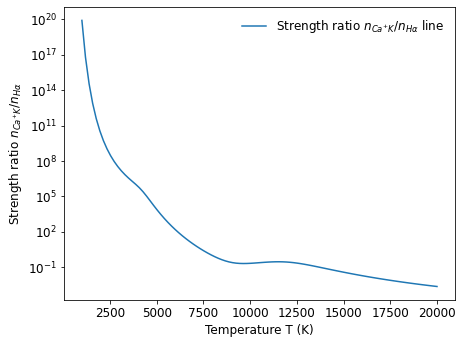

In [318]:
T = numpy.linspace(1000,20000,100)*units.K
Pe = 100 *units.dyne/units.cm**2
Pe = Pe.to('Pa')

H = Atom('H_atom.txt')
H.read_atom('H_atom.txt')

Ca = Atom('Ca_atom.txt')
Ca.read_atom('Ca_atom.txt')

H_ratio = numpy.zeros(len(T))
Ca_ratio = numpy.zeros(len(T))
for i in range(len(T)):
    H_ratio[i] = H.compute_populations(T[i],Pe)[0,1]
    Ca_ratio[i] = Ca.compute_populations(T[i],Pe)[1,0]


plt.plot(T,(Ca_ratio/H_ratio)*2*10**(-6), label = r'Strength ratio $n_{Ca^{+} K}/n_{H\alpha}$ line')
plt.yscale('log')
plt.xlabel('Temperature T (K)')
plt.ylabel(r'Strength ratio $n_{Ca^{+} K}/n_{H\alpha}$')
plt.legend()
plt.show()



As we can see that the Ca$^{+}$ K line is much bigger than the H$\alpha$ line in the range ($T \approx 4000 - 6000$ K). However, for higher temperatures we see that the H$\alpha$ line eventually starts to dominate. This is due to the fact that the strength of H$\alpha$ line is dependent on temperature, and becomes stronger for higher temperatures.

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">
    
* The relative population change $(\Delta n / \Delta T) / n$ is useful to to diagnose the temperature sensitivity of the populations of a given atomic stage. Plot in a log scale the relative population changes for the lower levels of Ca$^+$K and H$\alpha$ vs. temperature, using  $\Delta T=$ 1 K. Around $T=$ 5600 K the Ca$^+$K curve dips down to very  small values; the H$\alpha$ curve does that around $T=$ 9500  K. Thus, at $T \approx$ 5600 K the temperature sensitivity of Ca$^+$K is much smaller than the temperature sensitivity of H$\alpha$. Compare these plots with plots of the populations of the lower levels for the two lines (normalise them to the maximum value of each for easier comparison). You should find that the population plots have a peak and two flanks. Explain each flank of the population plots and the dips in the temperature sensitivity plots.
</div> 

We calculate the population density $n_{r,s}$ for H$\alpha$ and Ca$^{+}$ K lines, for temperatures from $800$ to $14000$ K with stepsize dT$ = 1$ K. Then for each temperature change ($T + $dT) we find the difference $\Delta$n for both lines and calculate the relative population ($\Delta n/\Delta T)/n$. We use $P_{e} = 10^2$ dyne/cm$^{2}$ as our electron pressure.

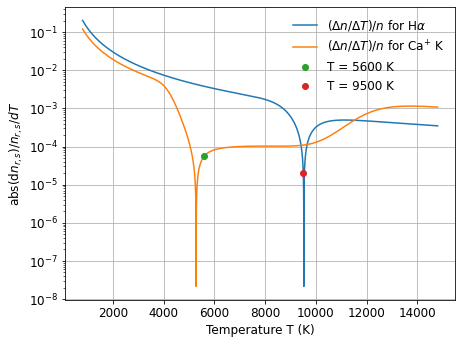

In [333]:
T0 = 800
N = 14000
dT = 1
temp = []; [temp.append(T0 + i*dT) for i in range(N)]
temp = numpy.array(temp)*units.K
Pe = 100 *units.dyne/units.cm**2
Pe = Pe.to('Pa')
dT = dT*units.K



n_H = H.compute_populations(temp,Pe)[0,1]
n_Ca = Ca.compute_populations(temp,Pe)[1,0]
"""
plt.plot(n_H)
plt.plot(n_Ca)
plt.yscale('log')
plt.show()
"""


H_ = ((abs(np.roll(n_H, -1) - n_H))/(dT*n_H))[:-1]
Ca_ = ((abs(np.roll(n_Ca, -1) - n_Ca))/(dT*n_Ca))[:-1]
temp = temp[:-1]


Ca_crit_I = 5600 - T0
H_crit_I = 9500 - T0


plt.plot(temp, H_, label= r'($\Delta n/\Delta T)/n$ for H$\alpha$')
plt.plot(temp, Ca_, label= r'($\Delta n/\Delta T)/n$ for Ca$^{+}$ K')
plt.plot(5600*units.K,Ca_[Ca_crit_I], 'o', label = 'T = 5600 K')
plt.plot(9500*units.K,H_[H_crit_I], 'o', label = 'T = 9500 K')
plt.yscale('log')
plt.xlabel('Temperature T (K)')
plt.ylabel('abs(d$n_{r,s})/n_{r,s}/dT$')
plt.grid()
plt.legend()




From the plot we can see that the H$\alpha$ curve dips very close to $T = 9500$ K, which is expected, while the Ca$^{+}$ K curve dips some time before we approach $5600$ K. The reason for this can either be that we should use a different electron pressure, or it may be a numerical error.

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">
    
* Find at which temperature the hydrogen in stellar photospheres with $P_e =$ 10 Pa is about 50% ionised. Plot the neutral and ionised fractions of hydrogen as a function of temperature.
</div>

Answer here

In [253]:
temp = np.linspace(4000,6000,1000)*units.K
Pe = 10*units.Pa


n_ion_H = H.compute_ionisation(temp,Pe)
print(n_ion_H)
I = numpy.where(numpy.abs(n_ion_H - 0.5) < 10**(-1))
print(np.sum(I))


[[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 9.99965494e-01
  9.99965161e-01 9.99964824e-01]
 [2.48313463e-11 2.53579636e-11 2.58952220e-11 ... 3.45058122e-05
  3.48393102e-05 3.51758154e-05]]
0
